# Explore here

In [4]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp= spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))



In [11]:

artist_id = "4mg42TyyXbySg7ivmjPFJp"

# Obtener las canciones más populares del artista
response = sp.artist_top_tracks(artist_id)

if response:
    tracks = response["tracks"]
    # Selecciona los datos relevantes para cada canción
    tracks = [
        {
            k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v
            for k, v in track.items()
            if k in ["name", "popularity", "duration_ms"]
        }
        for track in tracks
    ]

    # Muestra los resultados
    print("Canciones más populares de Mochi:")
    for track in tracks:
        print(f"- {track['name']} (Duración: {round(track['duration_ms'], 2)} min, Popularidad: {track['popularity']})")
else:
    print("No se recibió respuesta de la API de Spotify.")


Canciones más populares de Mochi:
- Stalemate (Duración: 1.24 min, Popularidad: 34)
- Taste of Your Love (Duración: 2.15 min, Popularidad: 31)
- Maybe I Shouldn't (Duración: 2.09 min, Popularidad: 21)
- Monster (Duración: 1.82 min, Popularidad: 20)
- bit of u (Duración: 3.35 min, Popularidad: 12)
- Thirst (Duración: 1.34 min, Popularidad: 11)
- Peach Juice (Duración: 2.69 min, Popularidad: 7)
- The Incredible Fly (Duración: 0.99 min, Popularidad: 1)
- Don't Close Your Eyes (Duración: 2.74 min, Popularidad: 3)
- Alive (Duración: 2.81 min, Popularidad: 3)


In [12]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                   name  popularity
7     0.989683     The Incredible Fly           1
8     2.744183  Don't Close Your Eyes           3
9     2.811200                  Alive           3


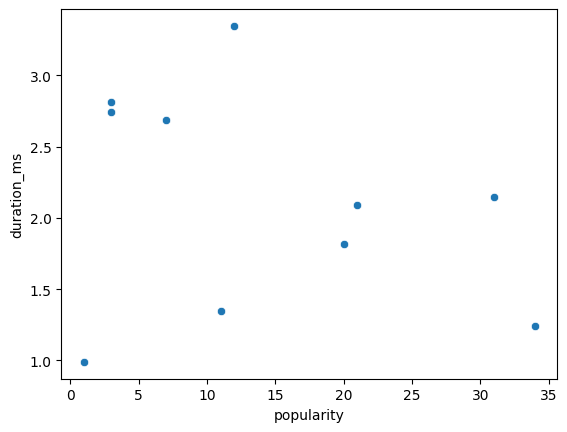

In [14]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")